Creamos el arbol

In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
X = genfromtxt("X_train_analisistfg.csv", delimiter=',')
y = genfromtxt("y_train_analisistfg.csv", delimiter='')
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
clf = clf.fit(X, y)

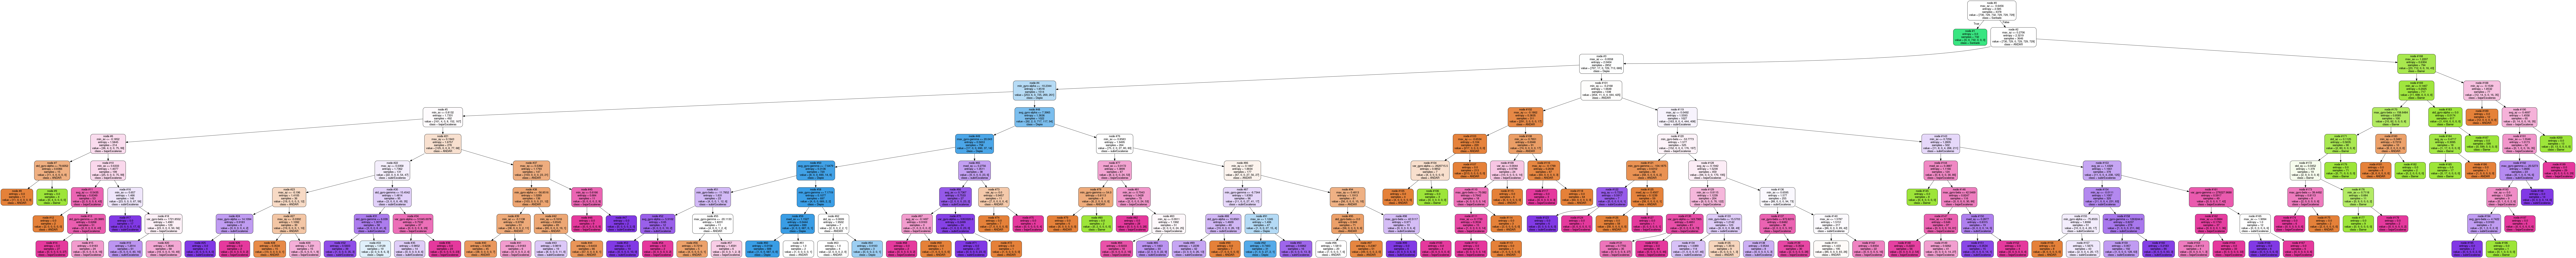

In [3]:
#Pintar aquí
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        clf, 
        out_file=None,
        feature_names=['var_gyro-alpha', 'var_gyro-beta', 'var_gyro-gamma', 'var_ax', 'var_ay', 'var_az','std_gyro-alpha', 'std_gyro-beta', 'std_gyro-gamma', 'std_ax', 'std_ay', 'std_az','max_gyro-alpha', 'max_gyro-beta', 'max_gyro-gamma', 'max_ax', 'max_ay', 'max_az','min_gyro-alpha', 'min_gyro-beta', 'min_gyro-gamma', 'min_ax', 'min_ay', 'min_az','avg_gyro-alpha', 'avg_gyro-beta', 'avg_gyro-gamma', 'avg_ax', 'avg_ay', 'avg_az','med_gyro-alpha', 'med_gyro-beta', 'med_gyro-gamma', 'med_ax', 'med_ay', 'med_az'] ,
    
        class_names=['ANDAR', 'Barrer','Sentado','Depie','subirEscaleras','bajarEscaleras'],  
        filled=True,
        rounded=True,
        node_ids=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

Calculamos el porcentaje de aciertos

In [4]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
skf.get_n_splits(X, y)
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(clf, X, y, cv = skf)*100
print(resultados) 

[ 84.15051311  85.51881414  84.8173516   85.38812785  84.63302752]


In [ ]:
np.mean(resultados)

Calculamos la y predicha  y las metricas(precision,accuracy y recall)

In [5]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf, X, y,cv=skf)
print(y_predict)

[ 7.  6.  1. ...,  6.  7.  6.]


In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)

0.8490178163544998

In [6]:
import itertools
import numpy as np
import matplotlib.pyplot as plt



from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[633   5   0  11  52  29]
 [  1 726   0   0   0   2]
 [  0   0 732   0   0   0]
 [  6   0   0 704  12   7]
 [114   0   0  14 478 123]
 [ 67   1   0   7 210 444]]


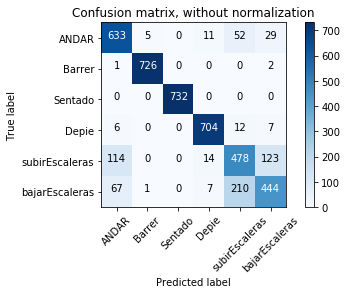

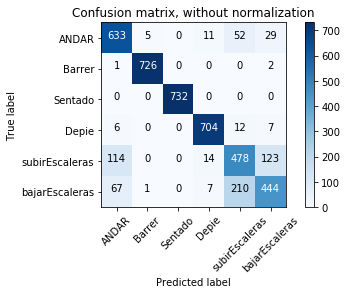

In [8]:
cnf_matrix = confusion_matrix(y, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['ANDAR', 'Barrer','Sentado','Depie','subirEscaleras','bajarEscaleras'],
                      title='Confusion matrix, without normalization')
plt.figure()
plt.show()

In [8]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Sentado','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.77      0.87      0.82       730
        Barrer       0.99      1.00      0.99       729
       Sentado       1.00      1.00      1.00       732
         Depie       0.96      0.97      0.96       729
subirEscaleras       0.64      0.66      0.65       729
bajarEscaleras       0.73      0.61      0.67       729

   avg / total       0.85      0.85      0.85      4378



In [9]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

In [11]:
import matplotlib.pyplot as plt
plot_classification_report(sampleClassificationReport)

[0.77, 0.87, 0.82]
[0.99, 1.0, 0.99]
[1.0, 1.0, 1.0]
[0.96, 0.97, 0.96]
[0.64, 0.66, 0.65]
[0.73, 0.61, 0.67]
plotMat: [[0.77, 0.87, 0.82], [0.99, 1.0, 0.99], [1.0, 1.0, 1.0], [0.96, 0.97, 0.96], [0.64, 0.66, 0.65], [0.73, 0.61, 0.67]]
support: [730, 729, 732, 729, 729, 729]


In [12]:
 plt.savefig('test_plot_classif_report.png', dpi=200, format='png', bbox_inches='tight')

C:\Users\veronica\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Reducimos el numero de caracteristicas y nos quedamos con las que mejor se ajusten al arbol

In [13]:
clf.feature_importances_

array([  3.77648104e-03,   4.12089930e-03,   3.70867727e-03,
         0.00000000e+00,   2.86314251e-03,   0.00000000e+00,
         3.81383838e-03,   2.37510130e-03,   6.69713426e-03,
         0.00000000e+00,   1.91995956e-03,   2.65195659e-03,
         5.54918333e-04,   6.84550267e-03,   1.73793911e-02,
         3.17704212e-02,   2.24227753e-02,   5.99162398e-01,
         6.03761875e-02,   1.15994220e-02,   1.07136826e-02,
         3.97954034e-02,   7.01639297e-02,   6.53765951e-03,
         4.61538768e-02,   2.77459166e-04,   1.14081377e-02,
         6.16747741e-03,   7.83372520e-03,   5.71750899e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.32460367e-03,   3.86833002e-03,   0.00000000e+00])

In [14]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape
print(model.get_support())


[False False False False False False False False False False False False
 False False False  True False  True  True False False  True  True False
  True False False False False False False False False False False False]


In [15]:
clf_new = DecisionTreeClassifier(criterion='entropy', max_depth=9,random_state=0)
clf_new = clf_new.fit(X_new, y)

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
skf.get_n_splits(X_new, y)
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(clf_new, X_new, y, cv = skf)*100
print(resultados) 

[ 83.92246294  85.29076397  83.67579909  84.93150685  85.43577982]


In [17]:
np.mean(resultados)

84.65126253250142

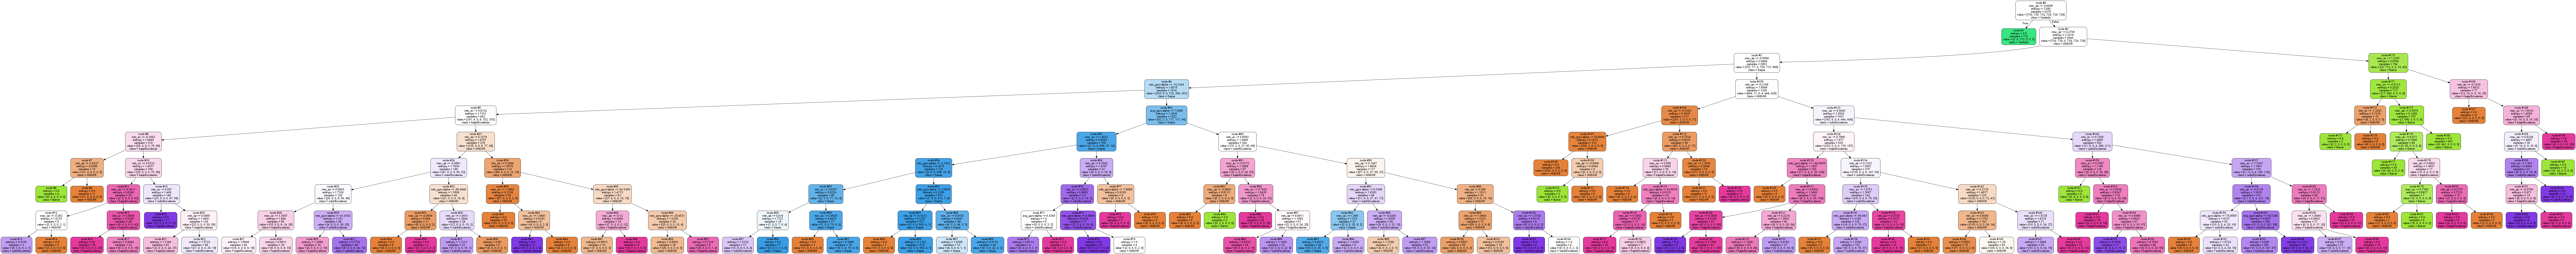

In [18]:
#Pintar aquí
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from IPython.display import display
from sklearn.tree import export_graphviz

if Version(sklearn_version) >= '0.18':
    
    try:
        
        import pydotplus
        
        dot_data = export_graphviz(
        clf_new, 
        out_file=None,
        feature_names=['max_ax',  'max_az','min_gyro-alpha', 'min_ax', 'min_az','avg_gyro-alpha'] ,
    
        class_names=['ANDAR', 'Barrer','Sentado','Depie','subirEscaleras','bajarEscaleras'],  
        filled=True,
        rounded=True,
        node_ids=True)

        graph = pydotplus.graph_from_dot_data(dot_data)  
        display(Image(graph.create_png()))

    except ImportError:
        print('pydotplus is not installed.')

In [20]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(clf_new, X_new, y,cv=skf)
print(y_predict)

[ 1.  7.  1. ...,  6.  6.  6.]


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict)

0.84650525354042938

In [21]:
from sklearn.metrics import classification_report
target_names = ['ANDAR', 'Barrer','Sentado','Depie','subirEscaleras','bajarEscaleras']
sampleClassificationReport=classification_report(y, y_predict, target_names=target_names)
print sampleClassificationReport

                precision    recall  f1-score   support

         ANDAR       0.84      0.81      0.82       730
        Barrer       0.99      1.00      1.00       729
       Sentado       1.00      1.00      1.00       732
         Depie       0.94      0.96      0.95       729
subirEscaleras       0.60      0.75      0.67       729
bajarEscaleras       0.74      0.56      0.64       729

   avg / total       0.85      0.85      0.85      4378



In [22]:
plot_classification_report(sampleClassificationReport)

[0.84, 0.81, 0.82]
[0.99, 1.0, 1.0]
[1.0, 1.0, 1.0]
[0.94, 0.96, 0.95]
[0.6, 0.75, 0.67]
[0.74, 0.56, 0.64]
plotMat: [[0.84, 0.81, 0.82], [0.99, 1.0, 1.0], [1.0, 1.0, 1.0], [0.94, 0.96, 0.95], [0.6, 0.75, 0.67], [0.74, 0.56, 0.64]]
support: [730, 729, 732, 729, 729, 729]


In [23]:
 plt.savefig('test_plot_classif_report_new.png', dpi=200, format='png', bbox_inches='tight')